In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name= 'data')

In [4]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# data preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
df['Qual_miles'].unique()

array([    0,  2024,   500,   967,  5031,  1182,  1776,  1745,   733,
        2398,  1250,  2706,  2998,  2556,  6727,  1374,  1952,  2000,
        1178,  7210,  2015,  2066,  2128,  2919,  1024,   589,  2880,
        3445,   862,  8264,  1604,  2975,   588,  1199,  2586,  3490,
        5051,  1115,   810,  4081,  2376,   948,  6286,  2253,  2565,
        2643,  8559,  3818,  8753,  9325,  4301,  1094,  3692,  1896,
        1000,  1388,  4116,  2505, 11148,   888, 10098,   745,  5124,
        2408,   867,  1846,  1514,  8019,   763,  4924,  1697,  1739,
        2370,  6168,   925,  2288,  1467,  1704,  2329,  1099,  1505,
        6920,  2139,  4481,  1448,   250,   783,  2360,  2364,  2396,
        1362,  5583,  1440,  5009,   909,  2395,  3867,  1452,  6057,
        2081,  1112,  2704,  7663,  3953,  5513,  2454,   957,  4704,
        7558,  2562,  4727,  5368,  1754,   651, 10074,  2900,  1692,
        2600,  1526,  3508,   629,  1651,  1674,  2433,  1249,  2543,
        2738,  1619,

In [8]:
df['Award?'].unique()

array([0, 1], dtype=int64)

In [9]:
df.drop('ID#',axis =1, inplace = True)

In [10]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [11]:
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [12]:
df.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

<Axes: >

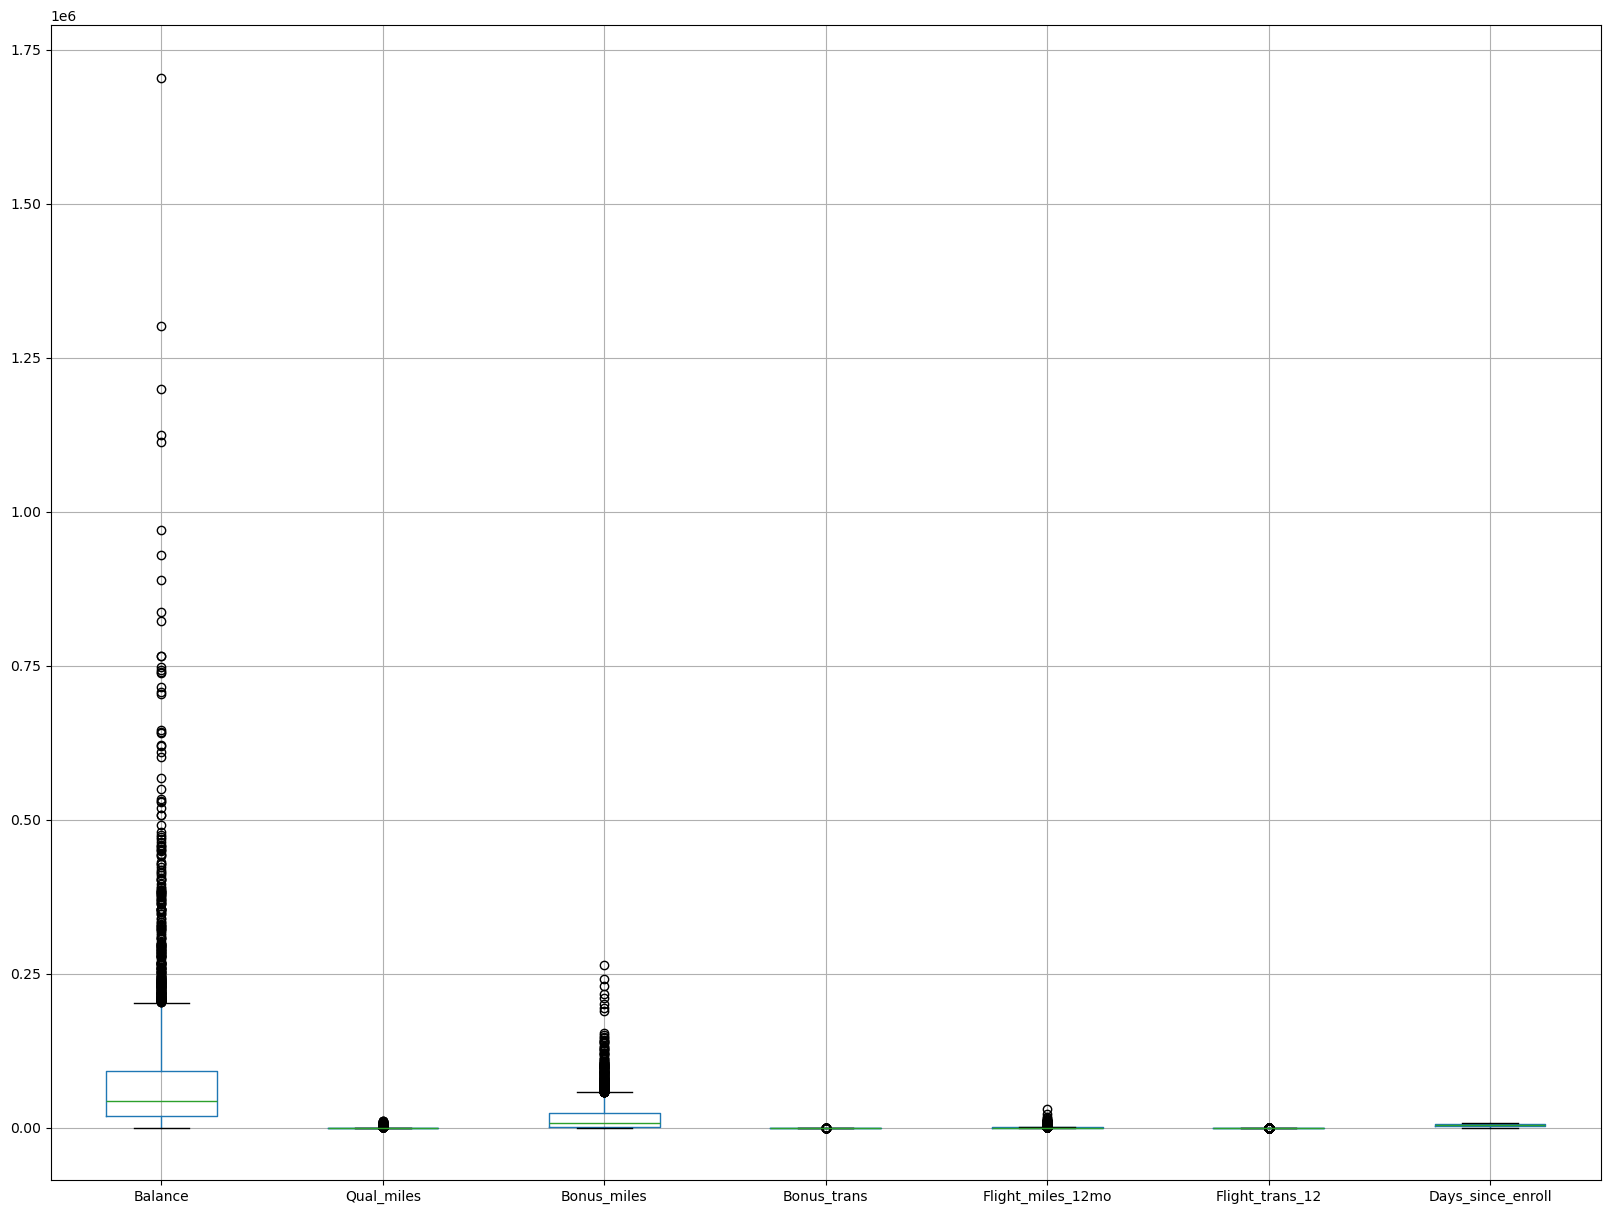

In [13]:
plt.figure(figsize = (20,15))
df[['Balance', 'Qual_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll']].boxplot()

In [14]:
q1 = np.percentile(df['Balance'],0.25)
q3 = np.percentile(df['Balance'],0.75)
iqr = q3- q1

In [15]:
upperbound = q3+ 1.5* iqr
upperbound

1135.1774999999998

In [16]:
len(df[df['Balance'] > upperbound])

3935

In [17]:
#not handling the outliers in the case of 'balance' as there are many  too many outliers to handle. 


<Figure size 2000x1500 with 0 Axes>

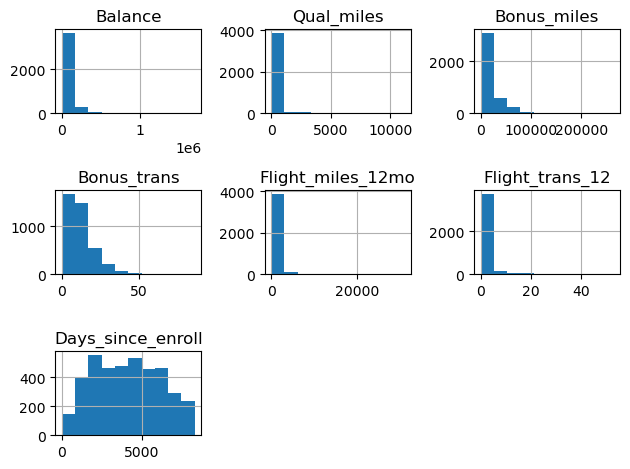

In [18]:
plt.figure(figsize = (20,15))
df[['Balance', 'Qual_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll']].hist()
plt.tight_layout()


In [19]:
df.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909
Days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000,0.188121


<Axes: xlabel='cc1_miles', ylabel='count'>

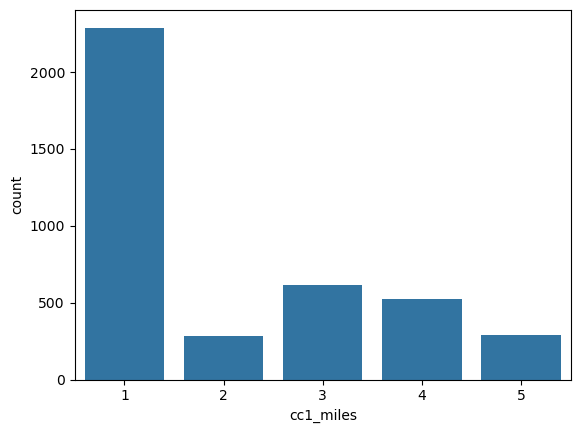

In [20]:
sns.countplot(x = 'cc1_miles' , data = df)

<Axes: xlabel='cc2_miles', ylabel='count'>

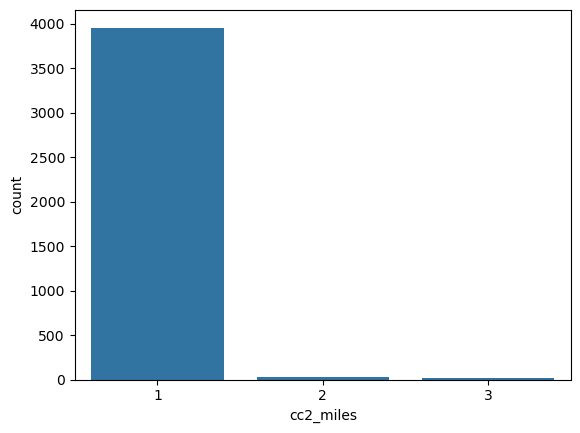

In [21]:
sns.countplot(x = 'cc2_miles' , data = df)

Text(0.5, 1.0, 'average customer Balances as per cc_miles')

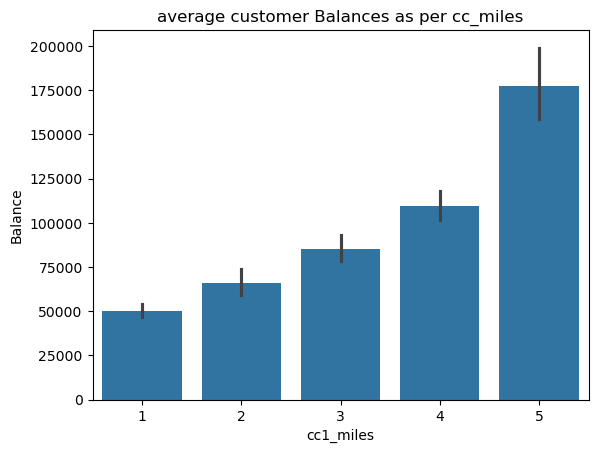

In [22]:
sns.barplot(x= 'cc1_miles', y = 'Balance', estimator = 'mean' , data =df)
plt.title('average customer Balances as per cc_miles')

In [23]:
#standard_scaling of columns
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df1 = df.copy()
df1[['Balance', 'Qual_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll']] = sc.fit_transform(df[['Balance', 'Qual_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll']])

In [24]:
df_cols = df.columns
df1 = pd.DataFrame(df1,columns= df_cols)

In [25]:
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,1,1,1,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,0
1,-0.539457,-0.186299,1,1,1,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,0
2,-0.320031,-0.186299,1,1,1,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,0
3,-0.583799,-0.186299,1,1,1,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,0
4,0.239678,-0.186299,4,1,1,1.083121,1.499394,1.154932,0.692490,1.363975,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,1,1,1,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1
3995,-0.091465,-0.186299,1,1,1,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1
3996,-0.000043,-0.186299,3,1,1,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1
3997,-0.185607,-0.186299,1,1,1,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,0


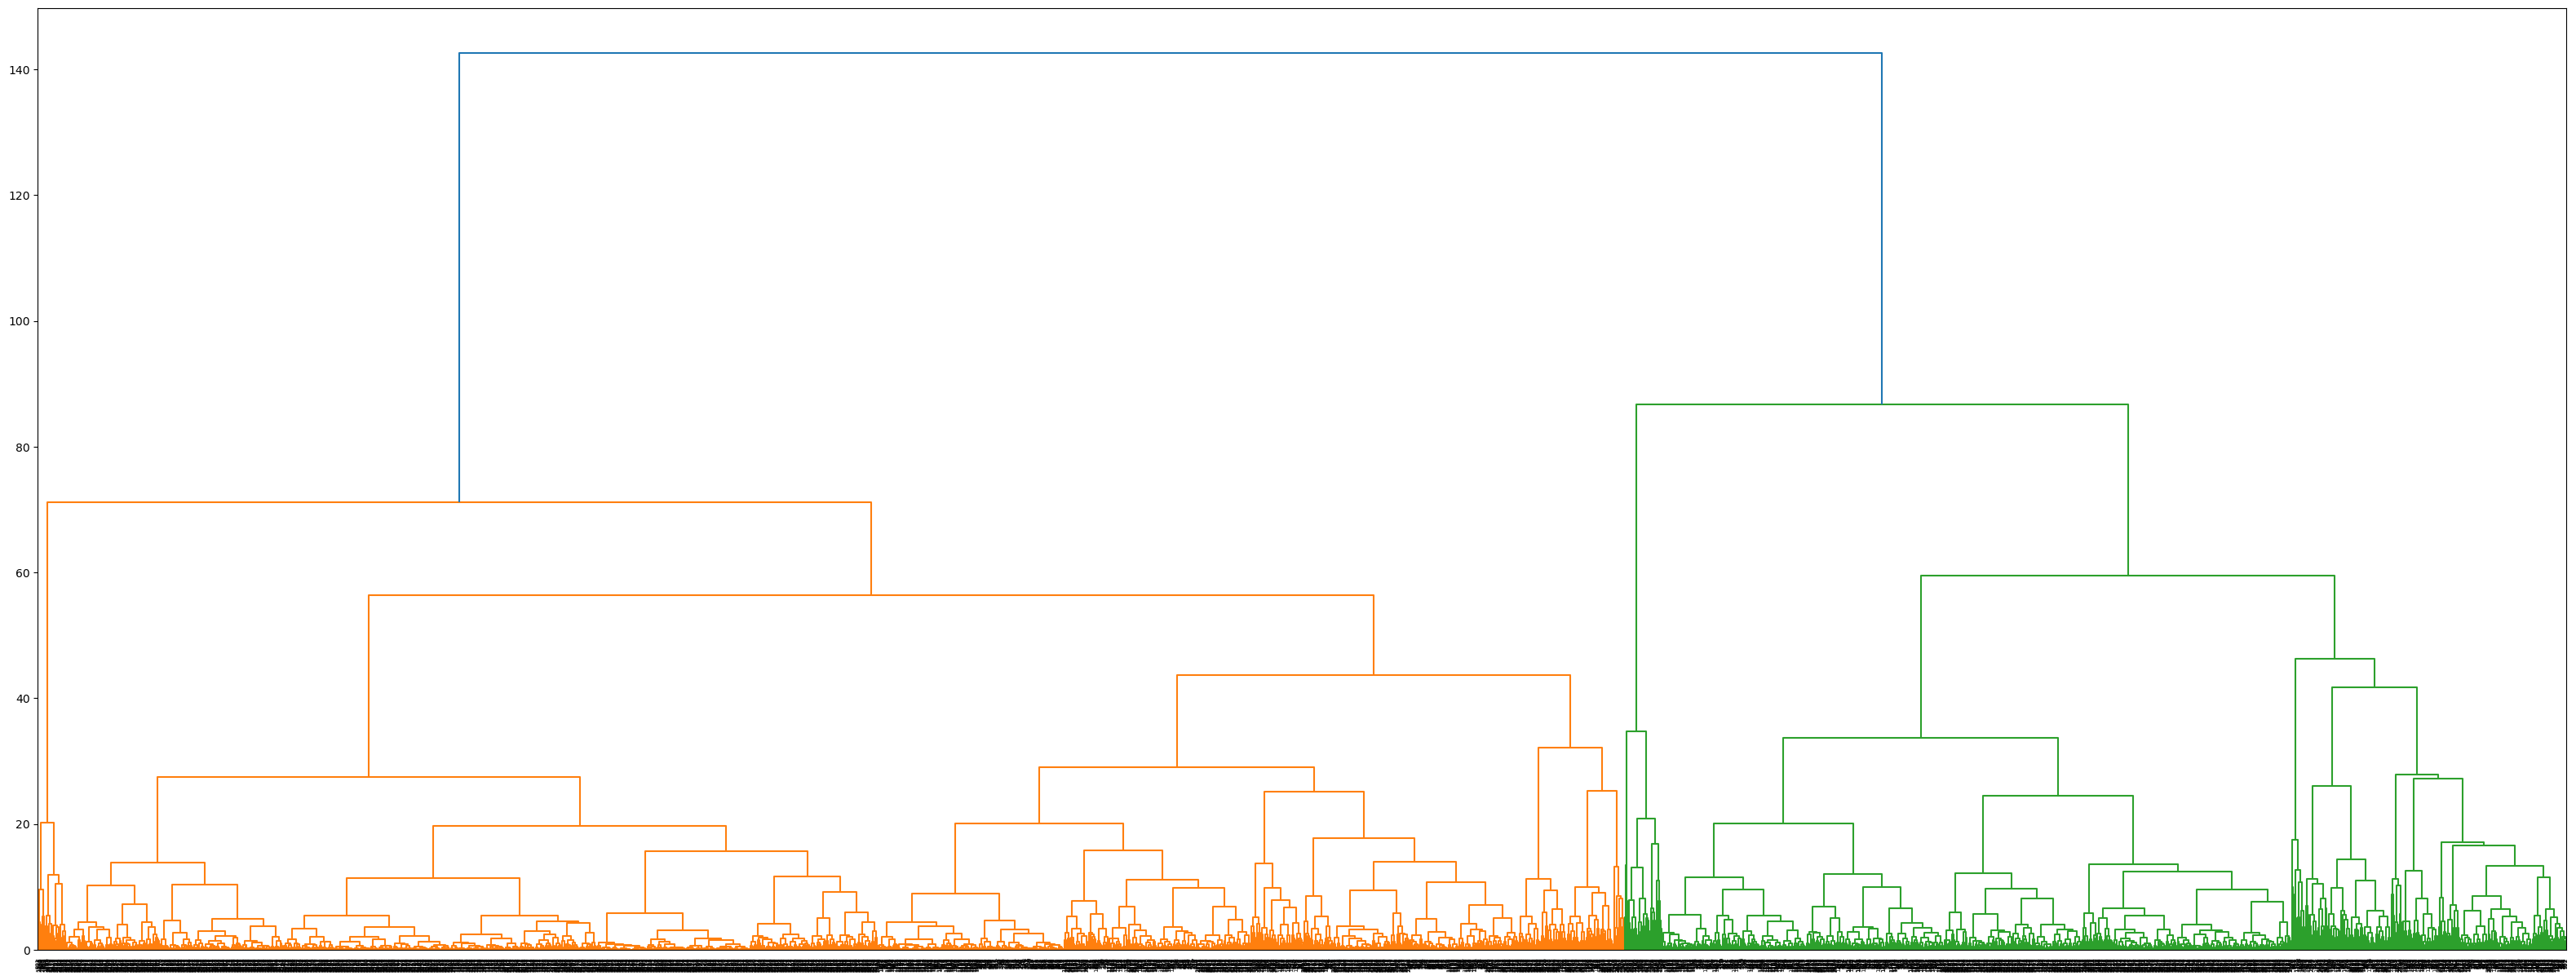

In [26]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(40,15))
sch.dendrogram(sch.linkage(df1 , method = 'ward'))
plt.show()

In [27]:
#hierarchial clustering
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, metric= 'euclidean', linkage = 'ward')# initialising the model

In [28]:
hc.fit(df1)

AgglomerativeClustering(n_clusters=5)

In [29]:
cluster = hc.fit_predict(df1)
cluster

array([0, 0, 0, ..., 4, 0, 0], dtype=int64)

In [30]:
df2 = df1.copy()

In [31]:
df2['hierarchial_clusters'] = cluster

In [32]:
df2.sort_values(by = 'hierarchial_clusters' , ascending= False)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hierarchial_clusters
1260,-0.148599,-0.186299,3,1,1,0.225119,0.145596,-0.328603,-0.362168,0.654974,0,4
1185,-0.057872,-0.186299,3,1,1,0.282225,0.353873,-0.328603,-0.362168,0.687906,0,4
711,-0.252477,-0.186299,4,1,1,0.995081,1.291118,-0.328603,-0.362168,1.053545,1,4
1836,0.276517,-0.186299,3,1,1,-0.104971,0.145596,-0.328603,-0.362168,0.050580,0,4
714,0.431891,-0.186299,4,1,1,0.999387,0.562149,0.028531,-0.098503,1.050639,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1802,-0.066754,-0.186299,1,1,1,-0.577227,0.562149,-0.328603,-0.362168,0.091744,1,0
1804,-0.417110,-0.186299,1,1,1,-0.709992,-1.208203,-0.328603,-0.362168,0.087386,0,0
1805,-0.612996,-0.186299,1,1,1,-0.709992,-1.208203,-0.328603,-0.362168,0.090776,1,0
1807,-0.074922,-0.186299,1,1,1,-0.362964,-0.375096,-0.328603,-0.362168,0.088354,0,0


In [33]:
## kmeans
from sklearn.cluster import KMeans
wcss = []
for i in range(2,11):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)

In [34]:
wcss


[26228.710662269372,
 21459.66223063964,
 18867.464295356418,
 17028.94573894692,
 15154.040285786672,
 14042.369866072975,
 12920.964981787256,
 12229.344338672434,
 11878.098039421715]

<Axes: >

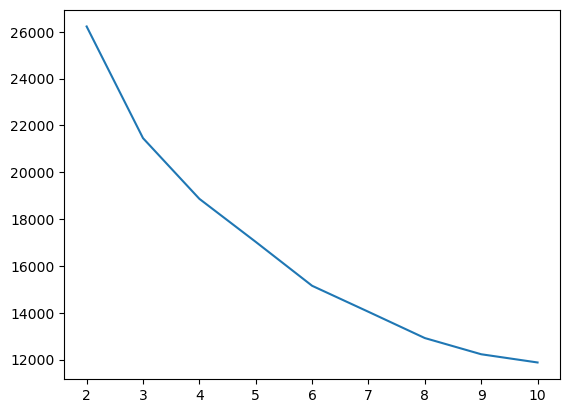

In [35]:
sns.lineplot(x = range(2,11), y = wcss)

In [36]:
kmeans = KMeans(n_clusters = 6 )
predict = kmeans.fit_predict(df1)

In [37]:
df2['kmeans_clusters'] = predict

In [38]:
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hierarchial_clusters,kmeans_clusters
0,-0.451141,-0.186299,1,1,1,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,0,0,1
1,-0.539457,-0.186299,1,1,1,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,0,0,1
2,-0.320031,-0.186299,1,1,1,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,0,0,1
3,-0.583799,-0.186299,1,1,1,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,0,0,1
4,0.239678,-0.186299,4,1,1,1.083121,1.499394,1.154932,0.692490,1.363975,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,1,1,1,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1,0,5
3995,-0.091465,-0.186299,1,1,1,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1,0,5
3996,-0.000043,-0.186299,3,1,1,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1,4,2
3997,-0.185607,-0.186299,1,1,1,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,0,0,5


In [39]:
#dbscan
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors= 8)
nbrs = nn.fit(df1)
distances, indices = nbrs.kneighbors(df1)

In [40]:
distances =np.sort(distances,axis =0)
a= distances[:,1]

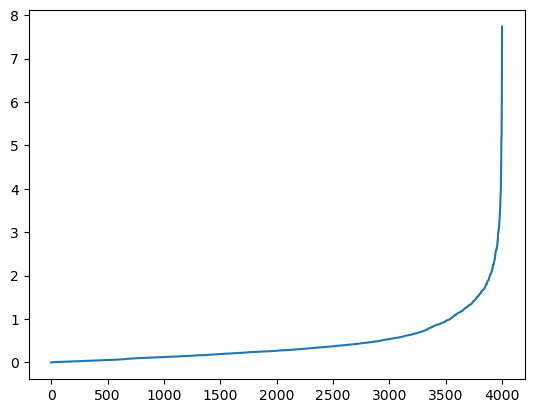

In [41]:
plt.plot(a)


In [42]:
from sklearn.cluster import DBSCAN

In [43]:
dbscan = DBSCAN(eps = 1, min_samples= 5)
cluster =dbscan.fit_predict(df1)

In [44]:
df2['dbscan_cluster'] = cluster

In [45]:
# Use pandas filtering and get noisy datapoints -1
df2[df2['dbscan_cluster']==-1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hierarchial_clusters,kmeans_clusters,dbscan_cluster
8,3.666042,-0.186299,3,2,1,-0.637398,3.269747,2.421330,2.801807,1.370271,1,1,3,-1
21,1.112309,2.430152,1,1,1,-0.159220,0.458011,0.957080,2.010813,1.345088,1,0,1,-1
22,-0.526158,-0.186299,1,1,1,-0.567123,-0.062681,2.135622,2.538142,1.339277,0,0,1,-1
24,1.310497,0.460058,1,1,1,-0.543311,0.978703,0.171385,0.692490,1.846813,0,0,1,-1
32,2.014326,-0.186299,4,1,1,1.031108,1.186979,-0.328603,-0.362168,1.817756,0,1,4,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3911,-0.175454,2.752037,1,1,1,-0.374394,0.770426,2.602754,3.856465,-1.242960,0,0,3,-1
3917,0.567139,-0.186299,4,1,1,2.002868,2.644916,4.206286,1.483484,-1.246350,0,1,3,-1
3934,0.029710,-0.186299,1,1,1,-0.271984,-0.999926,6.511944,-0.098503,-1.260879,0,0,3,-1
3961,0.570881,0.928020,1,1,1,-0.503225,-0.062681,-0.292890,-0.098503,-1.295748,0,0,5,-1


In [46]:
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hierarchial_clusters,kmeans_clusters,dbscan_cluster
0,-0.451141,-0.186299,1,1,1,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,0,0,1,0
1,-0.539457,-0.186299,1,1,1,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,0,0,1,0
2,-0.320031,-0.186299,1,1,1,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,0,0,1,0
3,-0.583799,-0.186299,1,1,1,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,0,0,1,0
4,0.239678,-0.186299,4,1,1,1.083121,1.499394,1.154932,0.692490,1.363975,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,1,1,1,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1,0,5,2
3995,-0.091465,-0.186299,1,1,1,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1,0,5,2
3996,-0.000043,-0.186299,3,1,1,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1,4,2,6
3997,-0.185607,-0.186299,1,1,1,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,0,0,5,0


In [47]:
from sklearn.metrics import silhouette_score
silhouette_score(df2,df2["hierarchial_clusters"])

0.37657161332984246

In [48]:
silhouette_score(df2,df2['kmeans_clusters'])

0.4009539445274688

In [49]:
silhouette_score(df2,df2['dbscan_cluster'])

0.2376585002946885

In [50]:
#visualizations  based on hierarchial clustering
label_0 = df[df2['hierarchial_clusters'] == 0]
label_1 = df[df2['hierarchial_clusters'] == 1]
label_2 = df[df2['hierarchial_clusters'] == 2]
label_3 = df[df2['hierarchial_clusters'] == 3]
label_4 = df[df2['hierarchial_clusters'] == 4]

Text(0.5, 1.0, 'Hierarchial clustering')

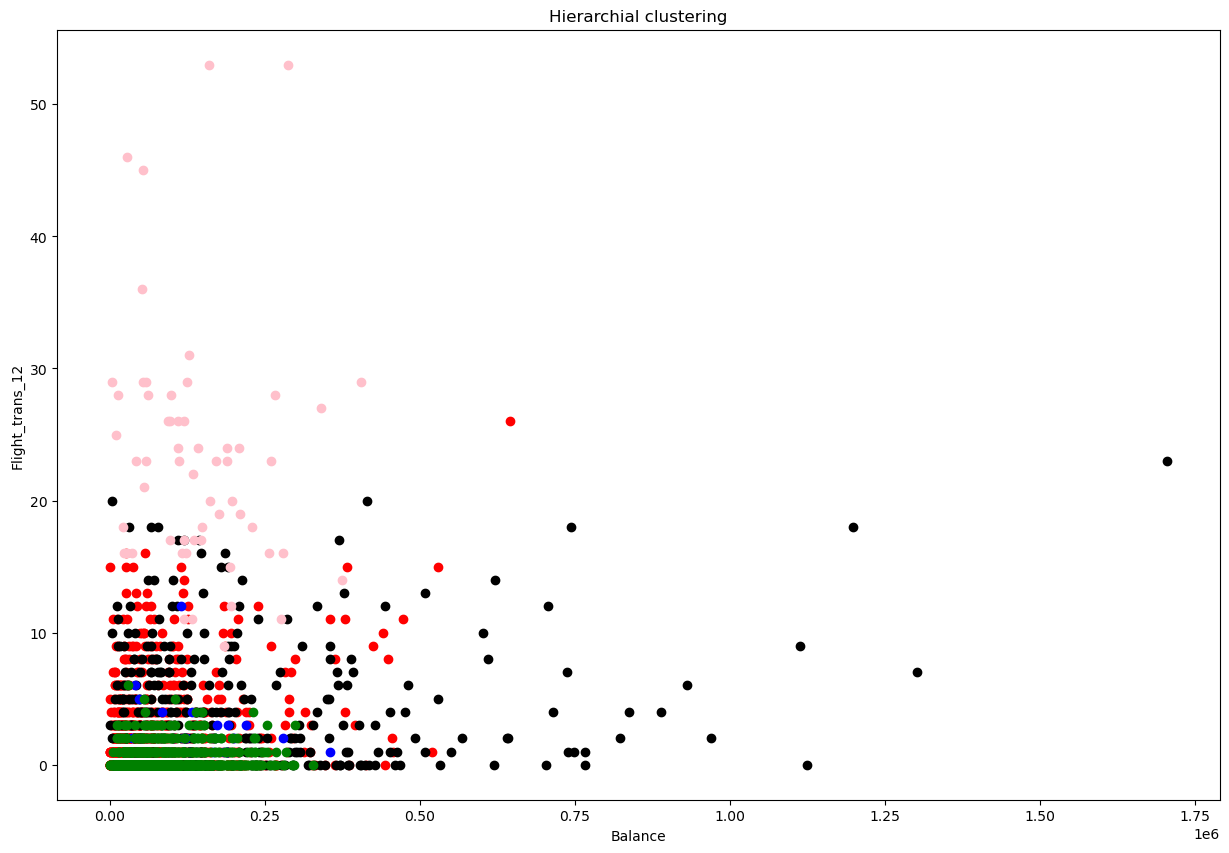

In [51]:
cols = df1.columns
plt.figure(figsize = (15,10))
plt.scatter(label_0[cols[0]], label_0[cols[8]], color = 'red')
plt.scatter(label_1[cols[0]], label_1[cols[8]], color = 'black')
plt.scatter(label_2[cols[0]], label_2[cols[8]], color = 'pink')
plt.scatter(label_3[cols[0]], label_3[cols[8]], color = 'blue')
plt.scatter(label_4[cols[0]], label_4[cols[8]], color = 'green')
plt.xlabel('Balance')
plt.ylabel('Flight_trans_12')
plt.title('Hierarchial clustering')

In [52]:
#visualizations  based on kmeans clustering
label_0 = df[df2['kmeans_clusters'] == 0]
label_1 = df[df2['kmeans_clusters'] == 1]
label_2 = df[df2['kmeans_clusters'] == 2]
label_3 = df[df2['kmeans_clusters'] == 3]
label_4 = df[df2['kmeans_clusters'] == 4]
label_5 = df[df2['kmeans_clusters'] == 5]

Text(0.5, 1.0, 'kmeans')

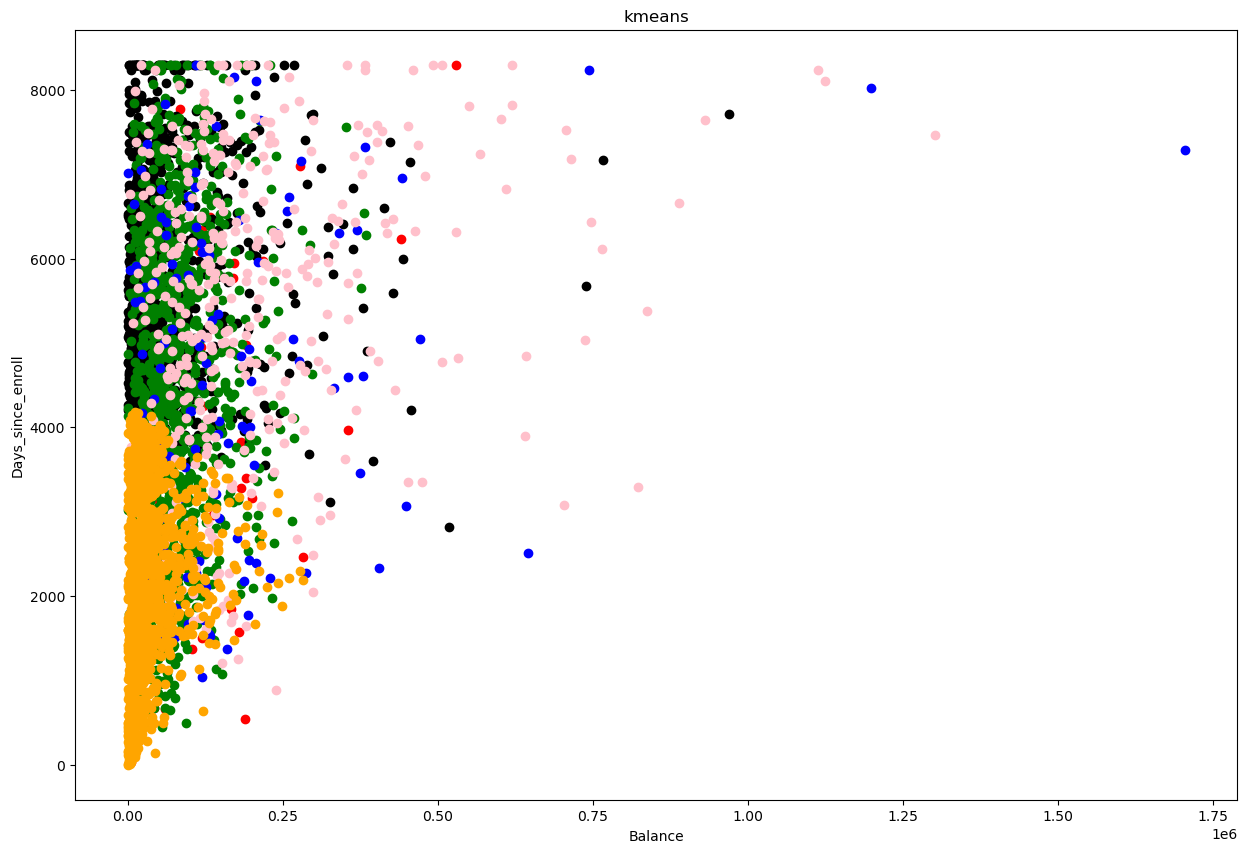

In [53]:
cols = df1.columns
plt.figure(figsize = (15,10))
plt.scatter(label_0[cols[0]], label_0[cols[9]], color = 'red')
plt.scatter(label_1[cols[0]], label_1[cols[9]], color = 'black')
plt.scatter(label_2[cols[0]], label_2[cols[9]], color = 'green')
plt.scatter(label_3[cols[0]], label_3[cols[9]], color = 'blue')
plt.scatter(label_4[cols[0]], label_4[cols[9]], color = 'pink')
plt.scatter(label_5[cols[0]], label_5[cols[9]], color = 'orange')
plt.xlabel('Balance')
plt.ylabel('Days_since_enroll')
plt.title('kmeans')

In [54]:
#visualizations  based on hierarchial clustering
label_0 = df[df2['dbscan_cluster'] == 0]
label_1 = df[df2['dbscan_cluster'] == 1]
label_2 = df[df2['dbscan_cluster'] == 2]
label_3 = df[df2['dbscan_cluster'] == 3]
label_4 = df[df2['dbscan_cluster'] == 4]

Text(0.5, 1.0, 'db_scan clustering')

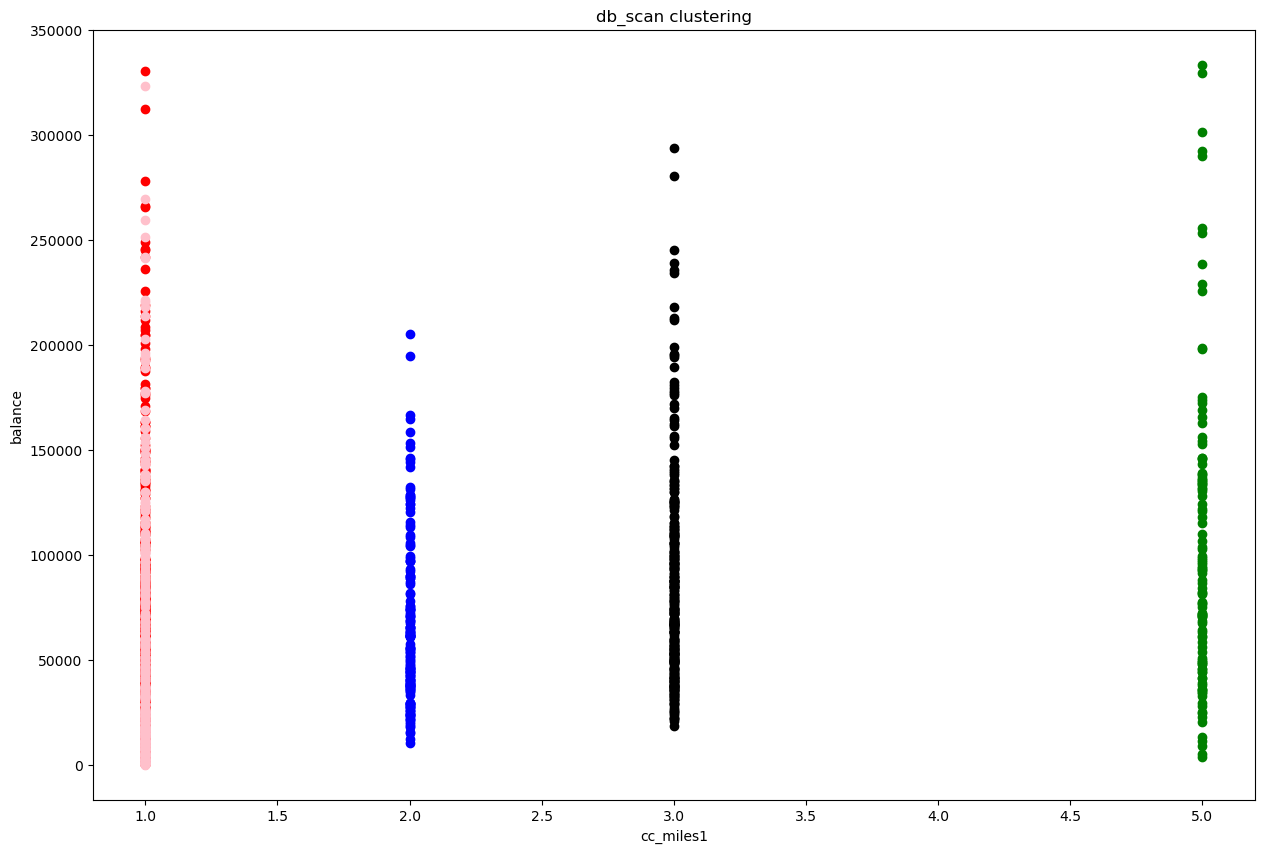

In [55]:
cols = df1.columns
plt.figure(figsize = (15,10))
plt.scatter(label_0[cols[2]], label_0[cols[0]], color = 'red')
plt.scatter(label_1[cols[2]], label_1[cols[0]], color = 'black')
plt.scatter(label_2[cols[2]], label_2[cols[0]], color = 'pink')
plt.scatter(label_3[cols[2]], label_3[cols[0]], color = 'blue')
plt.scatter(label_4[cols[2]], label_4[cols[0]], color = 'green')
plt.xlabel('cc_miles1')
plt.ylabel('balance')
plt.title('db_scan clustering')

#### from Dbscan clustering and visualization:

* Cluster 0 and Cluster 2: These clusters are characterized by a cc_miles value of 1, indicating that members of these clusters have earned 1 mile with their frequent flyer credit card in the past year.

* Cluster 3: This cluster is defined by a cc_miles value of 2, signifying that members have earned 2 miles with their frequent flyer credit card in the past year.


* Cluster 4: The defining characteristic of this cluster is a cc_miles value of 3, indicating that members have earned 3 miles with their frequent flyer credit card in the past year.


* Cluster 5: This cluster stands out with a cc_miles value of 5, meaning that members have earned 5 miles with their frequent flyer credit card in the past year.

##### from hierarchial clustering , we can see that cluster 0 and 3 have higher no. of flight transaction in last 12 months.
##### in kmeans the axis against which the visualisation is shown shows heavy overlapping of clusters, thus no conclusions can drawn.